In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('diabetes.csv')

In [5]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
df.shape

(768, 9)

In [7]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [9]:
df.corr()['Outcome']

,Outcome
Pregnancies,0.221898
Glucose,0.466581
BloodPressure,0.065068
SkinThickness,0.074752
Insulin,0.130548
BMI,0.292695
DiabetesPedigreeFunction,0.173844
Age,0.238356
Outcome,1.000000


In [10]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']

In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [12]:
X_scaled

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=1)

In [14]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Dropout

In [15]:
model = Sequential()

model.add(Dense(32, activation='relu', input_dim=8))

model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [16]:
model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])

In [17]:
model.fit(batch_size=32, x=X_train, y=y_train, epochs=100, validation_data=(X_test, y_test))

Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.5909 - loss: 0.6920 - val_accuracy: 0.6494 - val_loss: 0.6323
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6340 - loss: 0.6565 - val_accuracy: 0.7532 - val_loss: 0.5898
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6443 - loss: 0.6295 - val_accuracy: 0.7403 - val_loss: 0.5599
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6642 - loss: 0.5899 - val_accuracy: 0.7597 - val_loss: 0.5384
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6741 - loss: 0.5812 - val_accuracy: 0.7403 - val_loss: 0.5198
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7245 - loss: 0.5368 - val_accuracy: 0.7662 - val_loss: 0.5068
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7529 - loss: 0.5136 - val_accuracy: 0.7597 - val_loss: 0.4948
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7437 - loss: 0.5252 - val_accuracy: 0.7727 - 

In [18]:
# 1. How to select appropriate optimizer
# 2. No. of nodes in layer
# 3. How to select No. of layers
# 4. All in all one model


!pip install -q -U keras-tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 8.8 MB/s eta 0:00:00


In [19]:
import kerastuner as kt

/tmp/ipython-input-1654478174.py:1: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  import kerastuner as kt


In [20]:
def build_model(hp):

  model = Sequential()
  model.add(Dense(32, activation='relu', input_dim=8))
  model.add(Dense(1, activation='sigmoid'))

  optimizer = hp.Choice('optimizer', values=['adam', 'sgd', 'rmsprop','adagrad','adadelta'])

  model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

  return model

In [21]:
tuner = kt.RandomSearch(build_model, objective='val_accuracy', max_trials=5)

In [22]:
tuner.search(X_train, y_train, epochs=5, validation_data=(X_test, y_test))

Trial 5 Complete [00h 00m 02s]
val_accuracy: 0.5714285969734192

Best val_accuracy So Far: 0.7857142686843872
Total elapsed time: 00h 00m 22s


In [23]:
tuner.get_best_hyperparameters()[0].values

{'optimizer': 'rmsprop'}

In [24]:
model = tuner.get_best_models(num_models=1)[0]

/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 2 variables whereas the saved optimizer has 6 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [25]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 32)             │           288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 321 (1.25 KB)

 Trainable params: 321 (1.25 KB)

 Non-trainable params: 0 (0.00 B)

In [26]:
model.fit(X_train, y_train, batch_size=32, epochs=100,initial_epoch=6, validation_data=(X_test, y_test))

Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - accuracy: 0.7585 - loss: 0.4955 - val_accuracy: 0.7922 - val_loss: 0.4961
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.7420 - loss: 0.5113 - val_accuracy: 0.8052 - val_loss: 0.4879
Epoch 9/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.7540 - loss: 0.4919 - val_accuracy: 0.8117 - val_loss: 0.4804
Epoch 10/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.7728 - loss: 0.4819 - val_accuracy: 0.8312 - val_loss: 0.4748
Epoch 11/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.7618 - loss: 0.4647 - val_accuracy: 0.8312 - val_loss: 0.4712
Epoch 12/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.7792 - loss: 0.4659 - val_accuracy: 0.8247 - val_loss: 0.4690
Epoch 13/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7712 - loss: 0.4676 - val_accuracy: 0.8312 - val_loss: 0.4669
Epoch 14/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7444 - loss: 0.4849 - val_accuracy

In [27]:
def build_model(hp):

  model = Sequential()
  units = hp.Int('units', min_value=8, max_value=128)
  model.add(Dense(units=units, activation='relu', input_dim=8))
  model.add(Dense(1, activation='sigmoid'))

  model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

  return model

In [28]:
tuner = kt.RandomSearch(build_model, objective='val_accuracy', max_trials=5, directory = 'mydir', project_name='myproject')

In [29]:
tuner.search(X_train, y_train, epochs=5, validation_data=(X_test, y_test))

Trial 5 Complete [00h 00m 03s]
val_accuracy: 0.7857142686843872

Best val_accuracy So Far: 0.8116883039474487
Total elapsed time: 00h 00m 13s


In [30]:
tuner.get_best_hyperparameters()[0].values

{'units': 92}

In [31]:
model = tuner.get_best_models(num_models=1)[0]

In [32]:
model.fit(X_train, y_train, batch_size=32, epochs=100,initial_epoch=6, validation_data=(X_test, y_test))

Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.7777 - loss: 0.4761 - val_accuracy: 0.7987 - val_loss: 0.4692
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7747 - loss: 0.4653 - val_accuracy: 0.7987 - val_loss: 0.4647
Epoch 9/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7722 - loss: 0.4662 - val_accuracy: 0.7987 - val_loss: 0.4623
Epoch 10/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7583 - loss: 0.4568 - val_accuracy: 0.7922 - val_loss: 0.4610
Epoch 11/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7809 - loss: 0.4493 - val_accuracy: 0.7922 - val_loss: 0.4584
Epoch 12/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7820 - loss: 0.4276 - val_accuracy: 0.7987 - val_loss: 0.4583
Epoch 13/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7534 - loss: 0.4678 - val_accuracy: 0.7987 - val_loss: 0.4593
Epoch 14/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7678 - loss: 0.4473 - val_accuracy: 0.79

In [33]:
def build_model(hp):
  model = Sequential()
  model.add(Dense(86, activation='relu', input_dim=8))

  for i in range(hp.Int('num_layers', min_value=1, max_value=10)):
    model.add(Dense(86, activation='relu'))

  model.add(Dense(1, activation='sigmoid'))

  model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

  return model

In [34]:
tuner= kt.RandomSearch(build_model, objective='val_accuracy', max_trials=5, directory = 'mydir', project_name='num_layers')

In [35]:
tuner.search(X_train, y_train, epochs=5, validation_data=(X_test, y_test))

Trial 5 Complete [00h 00m 04s]
val_accuracy: 0.7857142686843872

Best val_accuracy So Far: 0.8311688303947449
Total elapsed time: 00h 00m 20s


In [36]:
tuner.get_best_hyperparameters()[0].values

{'num_layers': 8}

In [37]:
model = tuner.get_best_models(num_models=1)[0]

/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 2 variables whereas the saved optimizer has 22 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [38]:
model.fit(X_train, y_train, batch_size=32, epochs=100,initial_epoch=6, validation_data=(X_test, y_test))

Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.7540 - loss: 0.4833 - val_accuracy: 0.8117 - val_loss: 0.4676
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7821 - loss: 0.4518 - val_accuracy: 0.8117 - val_loss: 0.4534
Epoch 9/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8072 - loss: 0.4271 - val_accuracy: 0.7727 - val_loss: 0.4937
Epoch 10/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8104 - loss: 0.4094 - val_accuracy: 0.7857 - val_loss: 0.4756
Epoch 11/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8134 - loss: 0.3928 - val_accuracy: 0.8117 - val_loss: 0.4470
Epoch 12/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8364 - loss: 0.3822 - val_accuracy: 0.8117 - val_loss: 0.4795
Epoch 13/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8132 - loss: 0.4069 - val_accuracy: 0.8052 - val_loss: 0.4621
Epoch 14/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8293 - loss: 0.3798 - val_accuracy: 0.81

In [39]:
def build_model(hp):
  model = Sequential()

  counter = 0

  for i in range(hp.Int('num_layers', min_value=1, max_value=10)):
     if counter==0:
      model.add(Dense(hp.Int('units' + str(i), min_value=8, max_value=128),activation=hp.Choice('activation'+ str(i), values=['relu','tanh','sigmoid']), input_dim=8))
      model.add(Dropout(hp.Choice('dropout' + str(i), values=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])))
     else:
      model.add(Dense(hp.Int('units' + str(i), min_value=8, max_value=128), activation=hp.Choice('activation'+ str(i), values=['relu','tanh','sigmoid'])))
      model.add(Dropout(hp.Choice('dropout' + str(i), values=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])))


     counter+=1
  model.add(Dense(1, activation='sigmoid'))

  model.compile(optimizer = hp.Choice('optimizer', values=['adam', 'sgd', 'rmsprop','adagrad','adadelta']), loss='binary_crossentropy', metrics=['accuracy'])

  return model

In [40]:
tuner = kt.RandomSearch(build_model, objective='val_accuracy', max_trials=5, directory = 'mydir', project_name='final1')

In [41]:
tuner.search(X_train, y_train, epochs=5, validation_data=(X_test, y_test))

Trial 5 Complete [00h 00m 05s]
val_accuracy: 0.6428571343421936

Best val_accuracy So Far: 0.7792207598686218
Total elapsed time: 00h 00m 19s


In [42]:
tuner.get_best_hyperparameters()[0].values

{'num_layers': 1,
 'units0': 112,
 'activation0': 'relu',
 'dropout0': 0.8,
 'optimizer': 'adam'}

In [43]:
model = tuner.get_best_models(num_models=1)[0]

/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 10 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [44]:
history=model.fit(X_train, y_train, batch_size=32, epochs=200,initial_epoch=6, validation_data=(X_test, y_test))

Epoch 7/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.7166 - loss: 0.5813 - val_accuracy: 0.7662 - val_loss: 0.5203
Epoch 8/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6902 - loss: 0.5741 - val_accuracy: 0.7792 - val_loss: 0.5052
Epoch 9/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7135 - loss: 0.5783 - val_accuracy: 0.7792 - val_loss: 0.4945
Epoch 10/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7396 - loss: 0.5641 - val_accuracy: 0.7922 - val_loss: 0.4872
Epoch 11/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7582 - loss: 0.5164 - val_accuracy: 0.7922 - val_loss: 0.4820
Epoch 12/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7179 - loss: 0.5439 - val_accuracy: 0.7857 - val_loss: 0.4794
Epoch 13/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7539 - loss: 0.5304 - val_accuracy: 0.7792 - val_loss: 0.4774
Epoch 14/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7600 - loss: 0.5305 - val_accuracy: 0.77

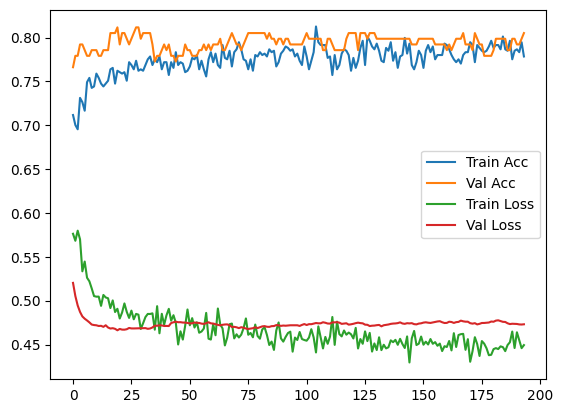

In [45]:
import matplotlib.pyplot as plt

# assuming `history` is your training result
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.show()
